<a href="https://colab.research.google.com/github/Manojgharge07/DataScience_Mentorship-Python_Projects/blob/main/Capston_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title- Customer Analysis: Predicting Potential Customers Who Can Buy Our Service.** 

## **Problem Description**

We have large number of customers. Our sales team would like to call potential customers who  can by our service. We don't  have to enough manpower & time to call & reach every customer & convinence them for our products. Also we need to rank customer so that we could offer them our product & services with discounted price.

## **You are given the following information:**

-InvoiceNo

-StockCode

-Description

-Quantity

-InvoiceDate

-UnitPrice

-CustomerID

-Country


## **Work Flow:**

-Customer Segmentation.

-Potential Vs Non-potential.

-Who Can Buy Our Services In Current Month? (Predicted Sales For 30, 60, 90 days)

-Customer Lifetime Values(CLTV). Live Vs Dead Customers

-Cohort Analysis.

-Lifetime Package. (Recency, Frequency, Monetory, Analysis)

# **1. Invite Some Libraries:**

In [ ]:
#import pandas and numpy module:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
from numpy import *
import datetime as dt

In [ ]:
#Making DataFrame:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/All CSV files/Copy of Online Retail.xlsx')

# **Review Our Dataset**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#There are null values in CustomerID column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
# There are 4372 unique locations from where the CustomerID.
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [116]:
#Dealing with negative values in Quantity
df['Quantity'] = df['Quantity'].abs()

df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
270954,560601.0,22138.0,BAKING SET 9 PIECE RETROSPOT,1.0,2011-07-19 17:17:00,4.95,16764.0,United Kingdom
148468,549240.0,48138.0,DOORMAT UNION FLAG,1.0,2011-04-07 11:37:00,7.95,15910.0,United Kingdom
148469,549240.0,23154.0,SET OF 4 JAM JAR MAGNETS,1.0,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148470,549240.0,23156.0,SET OF 5 MINI GROCERY MAGNETS,1.0,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148472,549240.0,21199.0,PINK HEART CONFETTI IN TUBE,1.0,2011-04-07 11:37:00,1.65,15910.0,United Kingdom
...,...,...,...,...,...,...,...,...
502122,578841.0,84826.0,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61624,C541433,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
#There is null values in CustomerID
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414.0,22139.0,NaN,56.0,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544.0,21773.0,DECORATIVE ROSE BATHROOM BOTTLE,1.0,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544.0,21774.0,DECORATIVE CATS BATHROOM BOTTLE,2.0,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544.0,21786.0,POLKADOT RAIN HAT,4.0,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544.0,21787.0,RAIN PONCHO RETROSPOT,2.0,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498.0,85099B,JUMBO BAG RED RETROSPOT,5.0,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498.0,85099C,JUMBO BAG BAROQUE BLACK WHITE,4.0,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498.0,85150.0,LADIES & GENTLEMEN METAL SIGN,1.0,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498.0,85174.0,S/4 CACTI CANDLES,1.0,2011-12-09 10:26:00,10.79,NaN,United Kingdom


# **Heat map for missing values**

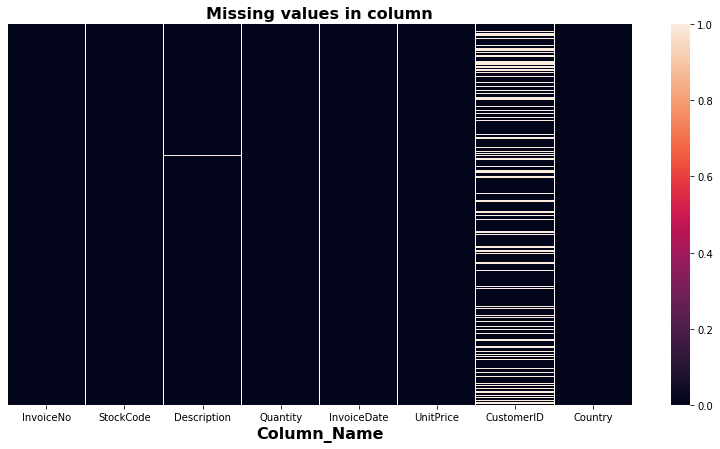

In [117]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=16, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=16)
plt.show()

In [123]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

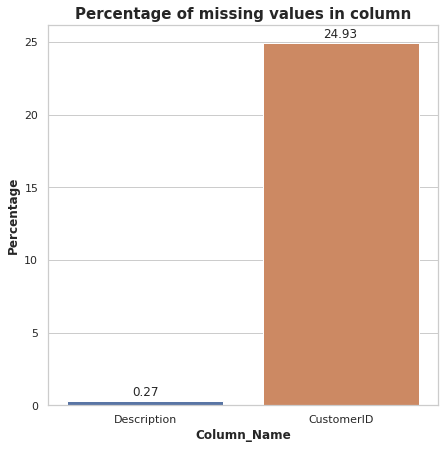

In [125]:
plt.figure(figsize=(7, 7))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=12, weight="bold")
plt.ylabel("Percentage", size=12, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=15)
plt.show()

There is high range of missing values in CustomerID column, so we are drop this.

In [ ]:
df1=df.dropna(subset=['CustomerID'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df1[df1['Quantity'] <=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144.0,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258.0,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978.0,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# restrict to transactions with positive quantities
df1 = df1[df1["Quantity"] > 0]

# datetime to date format
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"]).dt.date #normalize()
#df1.set_index("InvoiceDate", inplace=False)

# treat CustomerID as a categorical variable
df1["CustomerID"] = df1["CustomerID"].astype(np.int64).astype(object)

# review the categorical variables
df1.describe(include='object').T

,count,unique,top,freq
InvoiceNo,406829.0,22190.0,576339.0,542.0
StockCode,406829,3684,85123A,2077
Description,406829,3896,WHITE HANGING HEART T-LIGHT HOLDER,2070
InvoiceDate,406829,305,2011-11-06,3434
CustomerID,406829,4372,17841,7983
Country,406829,37,United Kingdom,361878


# **Unique values in each column:**

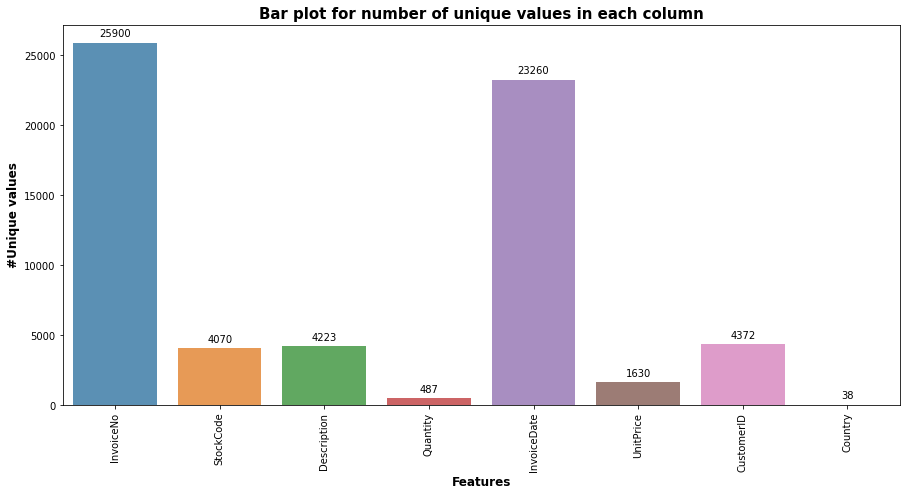

In [118]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# **Add new column of Revenues:**

In [ ]:
#It is defined as total purchase amount:
# revenues = quantity * unitprice
df1["Revenues"] = df1["Quantity"] * df1["UnitPrice"]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09,0.85,12680,France,10.20
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09,2.10,12680,France,12.60
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09,4.15,12680,France,16.60
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09,4.15,12680,France,16.60


In [ ]:
Unit = df1['UnitPrice']
Unit.replace(to_replace = 0.00, value =0.1, inplace=True)

In [ ]:
df1.sort_values("Quantity" , axis = 0, ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
540421,581483.0,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09,2.08,16446,United Kingdom,168469.60
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09,2.08,16446,United Kingdom,168469.60
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18,1.04,12346,United Kingdom,77183.60
61624,C541433,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18,1.04,12346,United Kingdom,77183.60
502122,578841.0,84826.0,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25,0.10,13256,United Kingdom,0.00
...,...,...,...,...,...,...,...,...,...
233061,557426.0,21625.0,VINTAGE UNION JACK APRON,1.0,2011-06-20,6.95,15016,United Kingdom,6.95
233060,557426.0,21364.0,PEACE SMALL WOOD LETTERS,1.0,2011-06-20,6.75,15016,United Kingdom,6.75
456017,575661.0,22573.0,STAR WOODEN CHRISTMAS DECORATION,1.0,2011-11-10,0.85,12617,France,0.85
456016,575661.0,23333.0,IVORY WICKER HEART MEDIUM,1.0,2011-11-10,1.25,12617,France,1.25


In [ ]:
df1.describe()

,Quantity,UnitPrice,Revenues
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460481,23.407255
std,248.624170,69.315161,427.437730
min,1.000000,0.001000,0.000000
25%,2.000000,1.250000,4.680000
50%,5.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


In [101]:
repeted_customer= df1.CustomerID.value_counts()

In [102]:
# getting top 10 customers:
repeted_customer.head(10)

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
15311    2491
14646    2085
13089    1857
13263    1677
14298    1640
Name: CustomerID, dtype: int64

In [98]:
df1.loc['Total'] = pd.Series(df1['Revenues'].sum(), index = ['Revenues'])
print (df1)

       InvoiceNo StockCode                          Description  Quantity  \
0       536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1       536365.0   71053.0                  WHITE METAL LANTERN       6.0   
2       536365.0    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3       536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4       536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541905  581587.0   22899.0         CHILDREN'S APRON DOLLY GIRL        6.0   
541906  581587.0   23254.0        CHILDRENS CUTLERY DOLLY GIRL        4.0   
541907  581587.0   23255.0      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908  581587.0   22138.0        BAKING SET 9 PIECE RETROSPOT        3.0   
Total        NaN       NaN                                  NaN       NaN   

       InvoiceDate  UnitPrice CustomerID         Country     Revenues  
0  

In [106]:
grp_by= df1.groupby('CustomerID', as_index=False)

In [107]:
grp_by.describe()

Quantity                                                               \
        count          mean        std      min      25%      50%      75%   
0         2.0  74215.000000   0.000000  74215.0  74215.0  74215.0  74215.0   
1       182.0     13.505495  18.856172      2.0      6.0     12.0     12.0   
2        31.0     75.516129  51.091990      1.0     24.0     72.0    120.0   
3        73.0      8.643836   6.982856      1.0      4.0      6.0     12.0   
4        17.0     11.588235   4.345383      1.0     12.0     12.0     12.0   
...       ...           ...        ...      ...      ...      ...      ...   
4367     10.0      4.500000   1.900292      2.0      3.0      4.0      6.0   
4368      7.0      7.714286   5.056820      1.0      3.5     10.0     12.0   
4369     13.0      8.307692  12.365170      1.0      2.0      5.0      8.0   
4370    756.0      1.847884   1.541267      1.0      1.0      1.0      2.0   
4371     70.0     22.657143  14.206434      4.0     12.0     24.0     30.0   

              UnitPrice            ...               Revenues                \
          max     count      mean  ...   75%     max    count          mean   
0     74215.0       2.0  1.040000  ...  1.04    1.04      2.0  77183.600000   
1       240.0     182.0  2.644011  ...  3.75   12.75    182.0     23.681319   
2       144.0      31.0  5.764839  ...  1.25   40.00     31.0     57.975484   
3        36.0      73.0  8.289041  ...  4.95  300.00     73.0     24.076027   
4        24.0      17.0  3.841176  ...  2.10   40.00     17.0     19.670588   
...       ...       ...       ...  ...   ...     ...      ...           ...   
4367      8.0      10.0  4.765000  ...  5.70    9.95     10.0     18.060000   
4368     12.0       7.0  5.622857  ...  9.75   16.95      7.0     11.545714   
4369     48.0      13.0  4.821538  ...  6.75   12.75     13.0     13.807692   
4370     13.0     756.0  1.614987  ...  2.08   15.95    756.0      2.771005   
4371     60.0      70.0  1.493571  ...  1.69    8.50     70.0     26.246857   

                                                                      
            std       min        25%       50%         75%       max  
0      0.000000  77183.60  77183.600  77183.60  77183.6000  77183.60  
1     23.289902      5.04     13.200     17.00     25.1400    249.60  
2     48.514857     13.20     39.600     41.76     60.0000    240.00  
3     34.655913      6.64     14.850     17.70     20.2800    300.00  
4      7.275538      8.50     15.000     19.80     25.2000     40.00  
...         ...       ...        ...       ...         ...       ...  
4367   3.380319     14.85     15.075     17.70     19.3875     23.70  
4368   6.110444      5.04      5.040     15.30     16.7250     16.95  
4369   6.722765      1.45     12.750     13.50     17.7000     25.50  
4370   2.549928      0.29      1.250      2.08      3.3000     20.80  
4371  19.751761      5.04     15.000     18.72     30.0000     87.00  

[4372 rows x 24 columns]

In [119]:
grp_by= df1.groupby(['CustomerID']).sum().sort_values('Revenues', ascending=False).head(10)
print(grp_by)

            Quantity  UnitPrice   Revenues
CustomerID                                
16446       161992.0       7.06  336942.10
14646       198263.0    5400.61  280923.02
18102        64126.0    5159.73  262876.11
17450        70957.0    3320.09  201619.41
14911        83850.0   31060.86  155077.50
12346       148430.0       2.08  154367.20
12415        78098.0    2500.02  126103.61
14156        58745.0    6544.29  121375.12
16029        48268.0   24111.14  111057.07
17511        66086.0    2607.08   93999.38


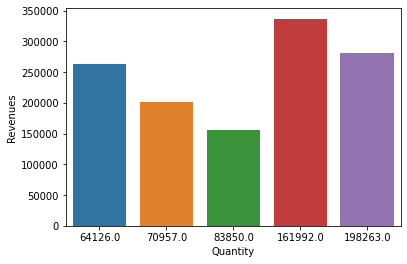

In [122]:
import seaborn as sns
sns.barplot(x = 'Quantity', y = 'Revenues' , data = grp_by.head(5))